## Model: Linear Regression

#### Imports And Load Dataset

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
df = pd.read_csv("Data/DataEncoded.csv")


Linear Regression is estimation algorithm used for predicting a continuous target variable.

As such it is not a good option in classifying the dataset to predict Obesity levels.

However with the data Encoding of these levels into 6 ordered category we can gain insight from this dataset.

#### Multi-Atribute Linear Regression

In [332]:
X = df.drop(["NObeyesdad"], axis=1)
Y = df["NObeyesdad"]

xTrain, xTest, yTrain, yTest = train_test_split(
    X, Y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(xTrain, yTrain)
yPred = reg.predict(xTest)
mse = mean_squared_error(yTest, yPred)
mae = mean_absolute_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

print(
    f"Multiple linear Regression - NObeyesdad\nMSE: {mse}\nMAE: {mae}\nR^2: {np.round(r2*100,2)}%")

Multiple linear Regression - NObeyesdad
MSE: 0.19397580765745995
MAE: 0.34092397137593683
R^2: 95.25%


The R Squared values tells us that there is a linear relationship between the attributes and the class Obesity since 95.25% of the datsset is explained by the regression model.

#### Visualization

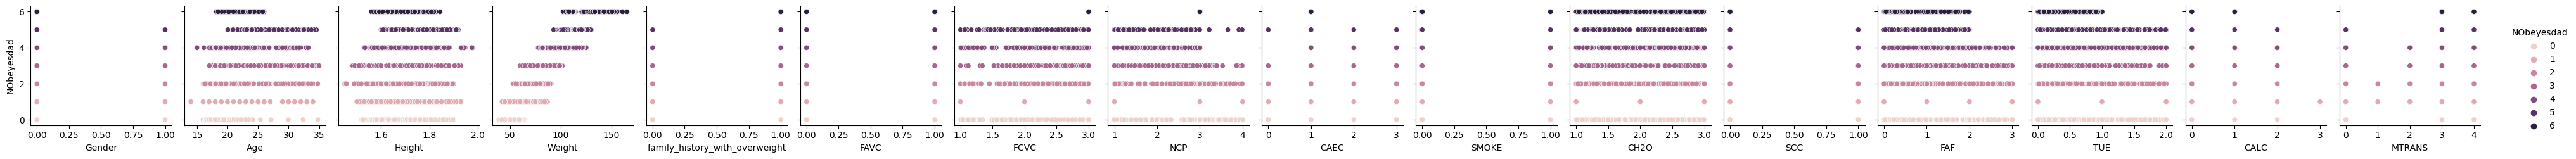

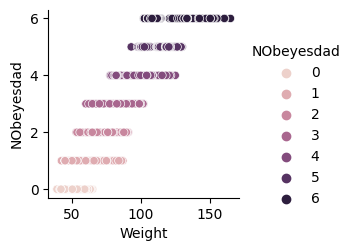

In [333]:
sns.pairplot(df,hue="NObeyesdad",y_vars=["NObeyesdad"])
sns.pairplot(df,hue="NObeyesdad",x_vars=["Weight"], y_vars=["NObeyesdad"])

Of the attributes, weight is the one with the most visible linear relation with the target class. We can use this to plot and visualize the regression line.

MSE: 0.6929246274745409
MAE: 0.6785159172302886
R^2: 83.04%



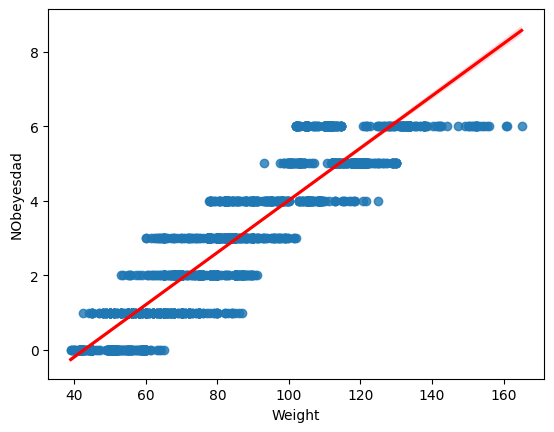

In [368]:
X = df["Weight"]
Y = df["NObeyesdad"]
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(np.array(xTrain).reshape(-1,1), yTrain)
yPred = reg.predict(np.array(xTest).reshape(-1, 1))
mse = mean_squared_error(yTest, yPred) 
mae = mean_absolute_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

print(f"MSE: {mse}\nMAE: {mae}\nR^2: {np.round(r2*100,2)}%\n")

sns.regplot(x="Weight", y="NObeyesdad", data=df, line_kws={"color": "red"})
plt.show()

# OLD

In [317]:
options = ["Age", "Weight", "Height"]
for option in options:
  X = df.drop([ option], axis=1)
  Y = df[option]

  xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)

  reg = LinearRegression()
  reg.fit(xTrain, yTrain)
  yPred = reg.predict(xTest)
  mse = mean_squared_error(yTest, yPred) 
  mae = mean_absolute_error(yTest, yPred)
  r2 = r2_score(yTest, yPred)

  print(f"{option}\nMSE: {mse}\nMAE: {mae}\nR^2: {np.round(r2*100,2)}%\n")


Age
MSE: 14.826729678610217
MAE: 2.949902629055531
R^2: 25.26%

Weight
MSE: 27.80374476268395
MAE: 4.03334633002633
R^2: 95.88%

Height
MSE: 0.0016158822602535747
MAE: 0.03249823191894308
R^2: 82.43%



The R Squared values tell us that Weight and Height are good alternatives to estimate since their values are above 50%

#### Attribute Selection

Now lets trey to optimize our attributes for these two class labels:

##### Backward Elimination

In [324]:
options = ["Age", "Weight", "Height"]
for option in options:
  X = df.drop(["NObeyesdad", option], axis=1)
  Y = df[option]
  
  xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)
  
  reg = LinearRegression()
  rfecv = RFECV(estimator=reg, step=1, cv=5, scoring='r2')
  # rfecv = RFE(estimator=reg, step=1)
  rfecv.fit(xTrain, yTrain)
  opt_feat = [X.columns[index] for index, needed in enumerate(rfecv.get_support()) if needed]
  print(f"{option}\nOptimal number of features: {rfecv.n_features_}\n")

Age
Optimal number of features: 15

Weight
Optimal number of features: 15

Height
Optimal number of features: 15



Backward elimination doesn't provide any improvements.

##### Forward inclusion

In [326]:
options = ["Weight", "Height"]

for option in options:
  cols = df.columns.drop([option])
  good_attributes = []
  last_max = 0
  while cols.size > 0:
    max_r2 = 0
    max_attribute = ""
    for attribute in cols:
      ok_attributes = good_attributes + [attribute]
      X = df[ok_attributes]
      Y = df[option]
      
      xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)
      
      reg = LinearRegression()
      reg.fit(xTrain, yTrain)
      yPred = reg.predict(xTest)
      r2 = r2_score(yTest, yPred)
      
      if abs(r2) > max_r2:
        max_attribute = attribute
        max_r2 = abs(r2)
        
    if last_max > max_r2:
      break
    last_max = max_r2
    good_attributes.append(max_attribute)
    cols = cols.drop(max_attribute)
  
  print(f"{option}\nOptimal attribute count:{len(good_attributes)}\nOptimal attributes: {good_attributes}\n")
  
  X = df[good_attributes]
  Y = df[option]
  xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)

  reg = LinearRegression()
  reg.fit(xTrain, yTrain)
  yPred = reg.predict(xTest)
  mse = mean_squared_error(yTest, yPred) 
  mae = mean_absolute_error(yTest, yPred)
  r2 = r2_score(yTest, yPred)
  print(f"MSE: {mse}\nMAE: {mae}\nR^2: {np.round(r2*100,2)}%\n\n")

Weight
Optimal attribute count:12
Optimal attributes: ['NObeyesdad', 'Height', 'FCVC', 'family_history_with_overweight', 'CALC', 'CH2O', 'CAEC', 'NCP', 'SCC', 'FAVC', 'MTRANS', 'TUE']

MSE: 26.94415155858529
MAE: 3.8827089114322284
R^2: 96.01%


Height
Optimal attribute count:11
Optimal attributes: ['Gender', 'Weight', 'NObeyesdad', 'family_history_with_overweight', 'NCP', 'FAF', 'FAVC', 'SCC', 'CALC', 'Age', 'CAEC']

MSE: 0.0016017130073987577
MAE: 0.03233591702359387
R^2: 82.58%




#### Visualization

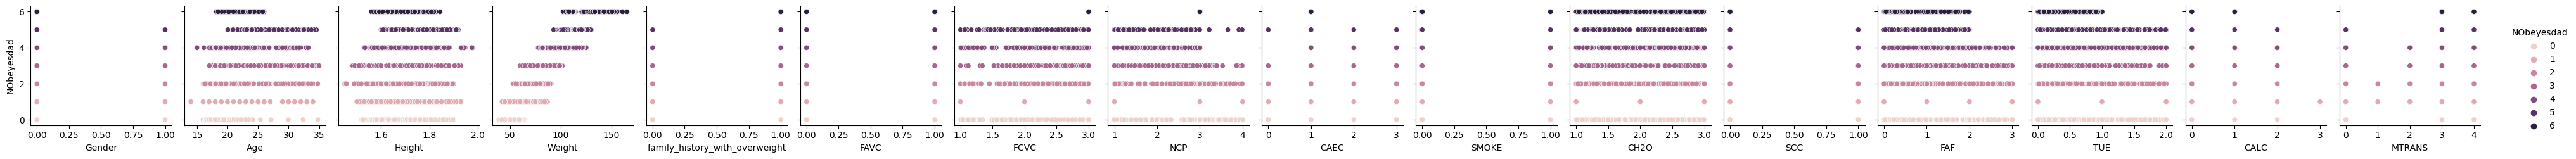

In [320]:
# for attribute in df.drop("Weight", axis=1).columns:
X = df[attribute]
Y = df["Weight"]

#   # print("e")
#   # xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)
#   # reg = LinearRegression()
#   # reg.fit(pd.DataFrame(xTrain), yTrain)
#   # yPred = reg.predict(pd.DataFrame(X))
#   plt.scatter(X, Y, color='g')
#   # plt.plot(X, yPred, color='k')
#   plt.xlabel("h")
#   plt.ylabel("w")
#   plt.show()



# # reg = LinearRegression()
# # reg.fit(xTrain, yTrain)
# # yPred = reg.predict(xTest)
# # mse = mean_squared_error(yTest, yPred)
# # mae = mean_absolute_error(yTest, yPred)
# # r2 = r2_score(yTest, yPred)

# # print(
# #     f"Multiple linear Regression - NObeyesdad\nMSE: {mse}\nMAE: {mae}\nR^2: {np.round(r2*100,2)}%")

sns.pairplot(df,hue="NObeyesdad",y_vars=["NObeyesdad"])


#### Evaluation

In [321]:
reg.fit(X[["NObeyesdad"]], Y)
plt.scatter(X["NObeyesdad"], Y, color='g')
plt.plot(X["NObeyesdad"], reg.predict(X[["NObeyesdad"]]), color='k')
plt.xlabel("h")
plt.ylabel("w")
# plt.xticks(())
# plt.yticks(())

plt.show()


KeyError: "None of [Index(['NObeyesdad'], dtype='object')] are in the [index]"